In [114]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [115]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [116]:
sp500.tail(1) #Adjusted Close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-12 00:00:00,128.789993,14.04,194.710007,153.240005,140.550003,106.68,80.279999,343.220001,633.659973,190.970001,...,86.230003,61.16,98.050003,31.92,107.940002,128.070007,117.449997,239.380005,38.130001,191.470001


In [117]:
# 20 Day lag. Change time_period before running code
time_period = 1260  # 1 year 252, 5 year 1260 
start_period = -20 - time_period
end_period = -20  
lagged_closed_price = sp500[start_period:end_period]
rolling_mean_price = sp500[-time_period:].rolling(window=time_period-252).mean().dropna(how='all')


In [118]:
lagged_closed_price[::39*5].pct_change().dropna(how='all')


/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1020/1924955338.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  lagged_closed_price[::39*5].pct_change().dropna(how='all')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-22 00:00:00,0.073630,-0.260824,0.051532,-0.208127,NaN,0.173607,0.395767,0.198706,0.175012,0.260217,...,0.155509,0.284628,-0.109270,0.476761,0.073159,0.314502,0.173123,0.126061,-0.157482,0.337860
2020-06-02 00:00:00,0.267160,-0.574144,0.534220,0.407163,NaN,0.111527,-0.232247,0.061420,0.357155,0.097564,...,-0.223518,0.064465,-0.288348,-0.099556,-0.089600,-0.202893,-0.057464,0.292152,-0.165886,0.122044
2021-03-11 00:00:00,0.356812,0.974153,0.516343,0.229876,NaN,0.283160,0.217577,0.308727,0.155261,0.311099,...,0.639952,-0.045292,0.376352,0.323264,0.501659,0.150859,0.254494,0.820402,0.762071,0.081434
2021-12-16 00:00:00,0.242849,-0.254176,0.419017,0.265452,-0.209683,0.171197,0.191944,0.517327,0.255022,0.156915,...,-0.415893,0.138143,0.044787,-0.125688,0.181806,0.291995,-0.245026,0.231492,0.124687,0.534068
2022-09-27 00:00:00,-0.189805,-0.257264,-0.115361,0.106073,-0.319798,-0.268789,-0.022454,-0.354252,-0.509672,-0.166544,...,-0.173783,0.019223,0.440923,-0.453736,-0.247547,-0.181523,-0.098351,-0.552480,-0.152756,-0.354937
2023-07-10 00:00:00,-0.020128,0.513447,0.248505,-0.023344,0.238225,0.103952,0.733411,0.218345,0.788198,0.366032,...,0.612580,-0.062241,0.251080,0.369633,0.276147,0.268313,0.370074,0.155539,-0.420738,0.146919


In [119]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculating 52 Week trend
    slope_info = pd.DataFrame(index = sp500.columns)
    for i in range(1,21):
        slope_info[i] = np.polyfit(range(len(rolling_mean_price[-i- 252: -i ])), rolling_mean_price[-i-252 : -i], 1)[0]  
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    _39_week_return = lagged_closed_price[::39*5].pct_change().dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[start_period:end_period]
    weekly_means = lagged_closed_price[::51*5].mean()                     
    weekly_volume = volume[::51*5].mean()           # Making it 51 week
    volume_price_trend = (weekly_means.pct_change() * weekly_volume).mean()
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = _39_week_return
    new_table['51 Week Volume Price Trend'] = volume_price_trend

    return new_table



In [120]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1020/3897740837.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  _39_week_return = lagged_closed_price[::39*5].pct_change().dropna(how='all').mean()
/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1020/3897740837.py:27: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volume_price_trend = (weekly_means.pct_change() * weekly_volume).mean()


,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.055072,38.382143,7.125965,0.121753,2.249091e+06
AAL,-0.015895,44.122800,-6.909119,0.023532,2.249091e+06
AAPL,0.122740,60.663190,15.986626,0.275709,2.249091e+06
ABBV,0.082660,40.513188,10.745892,0.129515,2.249091e+06
ABNB,NaN,32.404214,-6.202458,-0.097085,2.249091e+06
...,...,...,...,...,...
YUM,0.032792,36.516525,3.358363,0.106875,2.249091e+06
ZBH,0.010914,35.073644,0.689676,0.066142,2.249091e+06
ZBRA,0.077441,58.096262,4.983993,0.178861,2.249091e+06
ZION,-0.005830,52.432162,-0.662576,-0.001684,2.249091e+06


In [121]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1)



In [9]:
z_scores.sort_values(ascending=False, inplace= True)
long_basket= z_scores[:10]
short_basket = z_scores[-10:]

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)

Long Basket:
TSLA    43.112659
MRNA    20.350811
ENPH    19.162555
NVDA    16.052076
NVR     15.573304
AMD     10.146412
AZO      9.845765
CMG      9.678539
SEDG     8.229572
FCX      8.150967
dtype: float64
Short Basket:
MMM    -5.289826
BXP    -5.290819
VZ     -5.296504
WBA    -5.517205
BAX    -5.952064
PARA   -6.070260
FIS    -6.116725
WBD    -6.217212
VTRS   -6.572596
VFC    -7.614915
dtype: float64


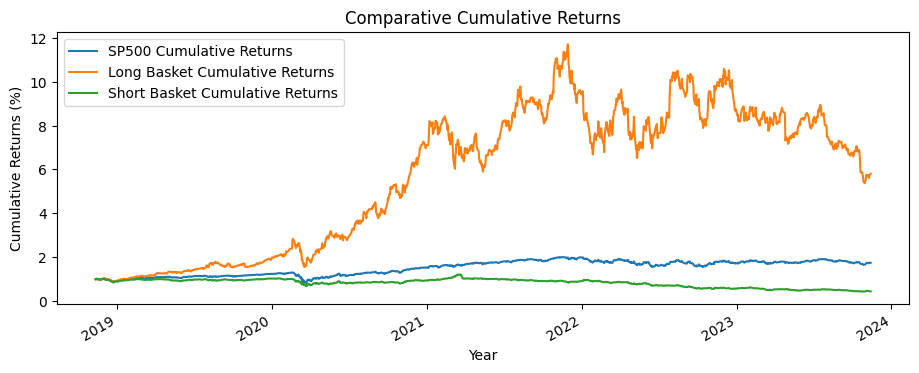

In [122]:
#Back-Test period of time_period year (20 Day Lag)

long_list =long_basket.index
short_list= short_basket.index

long_lagged_closed_price = lagged_closed_price[long_list]
short_lagged_closed_price = lagged_closed_price[short_list]


# I should make this next part a function, for autonomy
returns = sp500[start_period:end_period].pct_change()
cumulative_returns = (1 + returns).cumprod().mean(axis=1)


long_returns = long_lagged_closed_price.pct_change()
long_cumulative_returns = (1+long_returns).cumprod().mean(axis=1)

short_returns = short_lagged_closed_price.pct_change()
short_cumulative_returns = (1+short_returns).cumprod().mean(axis=1)



plt.figure(figsize=(11,4))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()




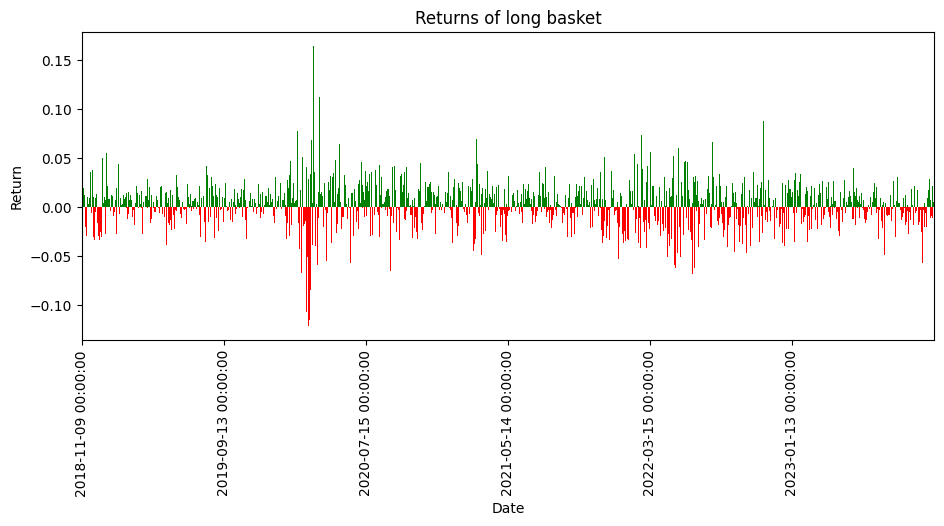

In [123]:
graphing = pd.DataFrame(long_returns.mean(axis=1))
graphing.columns = ['Returns']

colors = ['r' if m < 0 else 'g' for m in graphing.Returns]
graphing.plot.bar(figsize=(11,4), y='Returns',color=colors, legend=False,width=1.3)
plt.locator_params(axis='x', nbins=6)
plt.ylabel('Return')
plt.title('Returns of Long Basket')
plt.show()



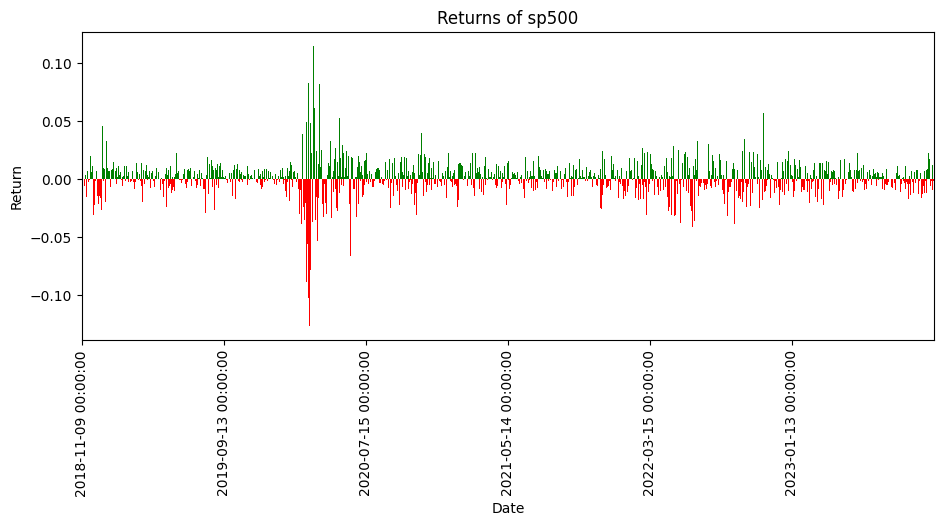

In [124]:
graphing_sp500 = pd.DataFrame(returns.mean(axis=1))
graphing_sp500.columns = ['Returns']

colors = ['r' if m < 0 else 'g' for m in graphing_sp500.Returns]
graphing_sp500.plot.bar(figsize=(11,4), y='Returns',color=colors, legend=False,width = 1.3)
plt.locator_params(axis='x', nbins=6)
plt.ylabel('Return')
plt.title('Returns of Sp500')
plt.show()

In [125]:
# Monthly
# testing the index to grab data entry every 20 rows, to simulate the monthly effect.
lagged_closed_price[::20].pct_change().dropna(how='all')

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-11,0.056192,-0.058531,-0.175283,-0.006983,NaN,-0.013051,-0.039153,-0.041477,0.002042,0.017440,...,0.081214,0.063170,-0.051812,0.026068,-0.077032,-0.005919,-0.047696,-0.063526,-0.128484,-0.056127
2019-01-10,-0.013753,-0.060411,-0.087944,0.000340,NaN,-0.038419,-0.004405,-0.071257,-0.030855,-0.000338,...,0.055524,-0.072296,-0.060381,0.084729,0.053348,0.022046,-0.071828,-0.056598,0.007135,-0.043430
2019-02-08,0.084406,0.126659,0.112750,-0.085633,NaN,0.066445,0.117625,0.058291,0.080876,0.136779,...,0.123968,0.085448,0.038186,0.064435,0.024379,0.029415,0.162553,0.100093,0.120658,0.012823
2019-03-11,0.046174,-0.109722,0.049821,-0.019957,NaN,0.061093,0.068294,0.053667,0.015409,0.074473,...,-0.041003,0.048055,0.078400,0.160958,0.092846,0.039567,0.006883,0.187358,0.002357,0.090982
2019-04-08,0.032245,0.057098,0.118502,0.075564,NaN,0.009125,0.009265,0.091314,0.030081,0.037704,...,0.213454,-0.006097,0.040361,0.019000,0.057745,0.018407,0.062548,0.057245,-0.025379,0.079172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.012976,0.178261,0.086359,-0.037053,0.179926,0.038543,0.008917,0.040478,0.325241,0.078699,...,0.030765,-0.038603,-0.048239,0.035281,0.102333,0.040978,0.121361,0.011247,-0.081809,-0.004553
2023-07-24,0.071545,0.038130,0.032516,0.065092,0.183516,0.065893,0.121254,0.053604,0.080748,0.034581,...,0.031766,0.047987,0.030469,0.056286,0.026389,0.017257,-0.021668,0.144743,0.392857,0.104639
2023-08-21,-0.069370,-0.101896,-0.086498,0.048750,-0.160005,-0.093788,-0.076857,-0.021641,-0.006471,-0.078754,...,-0.121485,-0.109404,0.038677,-0.071676,-0.123289,-0.066261,-0.145666,-0.115866,-0.057198,-0.025703


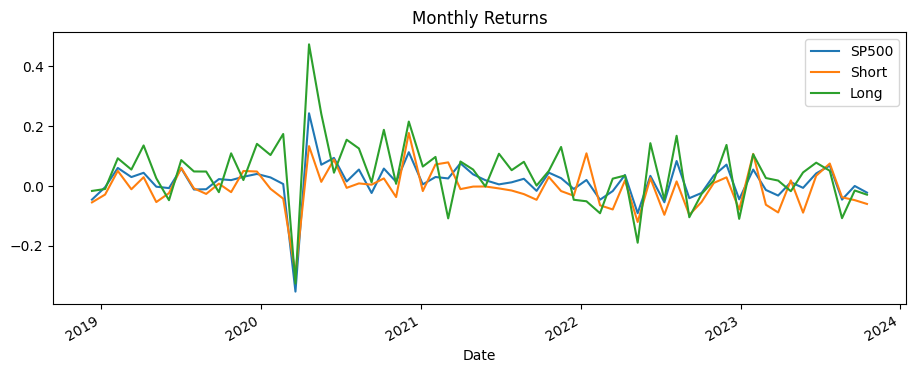

In [127]:
# monthly returns 
monthly_graph = pd.DataFrame()
lagged_closed_price[::20].pct_change().dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500')
short_lagged_closed_price[::20].pct_change().dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short')
long_lagged_closed_price[::20].pct_change().dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long')
plt.legend()
plt.title('Monthly Returns')
plt.show()


